neural network example from: <i><b style='color:red;'>grokking</b> <b>Deep Learning</b></i>
<p>by Andrew W. Trask</p>

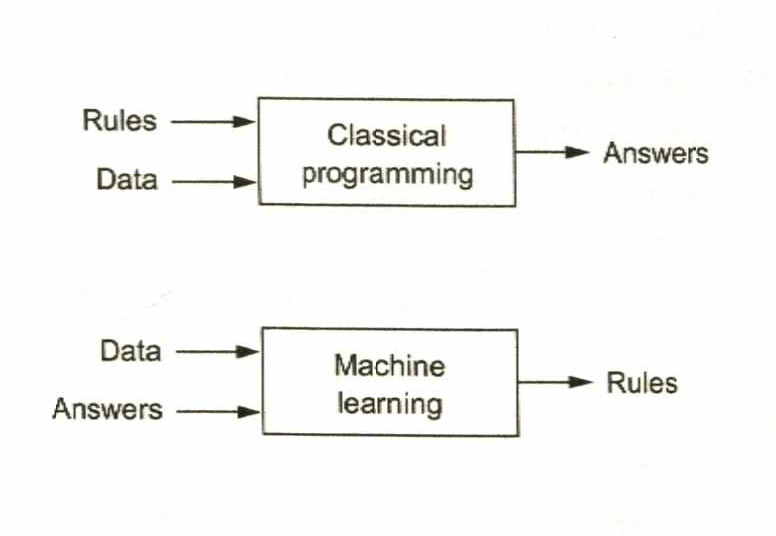

In [2]:
from IPython.display import Image
Image("images/chollet_change_of_paradigm.jpg", width=400)

<p><i>Machine learning: A New Programming Paradigm</i></p>
<p>from <i>Chollet, François</i>. <b>Deep Learning With Python</b>. pg 4. Manning Publications, 2021.</p>

<p><b>prerequisites</b></p>
$$f(x) = \mathbf{w^{*}x} + b^{*},$$
where <b>w*</b> and b* are optimal values for parameters <b>w</b> and b
<p></p>
<p>layer</p>
<p>weight</p>
<p>optimizer: used to update the weights throughout the neural network. gradient descent, which uses y=x**2</p>
<p>activation functions: relu: REctified Linear Unit, a nonlinear function that allows a two-layer neural network to be a universal function approximator</p>
<p>backpropagation</p>: both the optimizer and the activation functions must be differentiable.
<p></p>
<p><b>"The interface for the neural network is simple: it accepts an <i>input</i> variable as information and a <i>weights</i> variable as knowledge, and it outputs a prediction."</b></p>
<p><b>"Measuring error simplifies the problem of training neural networks to make correct predictions."</b></p>
<p><b>"Different ways of measuring the error prioritize error differently."</b></p>
<p>Error is calculated and applied to modify the weights during each iteration of the training.</p>
<p><b>"<i>alpha</i> is the simplest way to prevent overcorrecting weight updates."</b></p>

In [3]:
%%html
<iframe src="https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot" width="800" height="565"></iframe>

In [1]:
from numpy import array, random, dot, sum

In [2]:
# initialization, functions

def gradient_descent(prediction, target):
    ''' Optimization function.
        One method for calculating error.
    '''
    return (prediction - target)**2

def gradient_descent_deriv(weights):
    ''' Taking the derivative of the error
        during training
        yields amount and direction of the prediction
        from the target.
    '''
    return (2 * weights - 1)
    
def relu(x):
    ''' Activation function.
        Returns x iff x > 0; otherwise, returns 0
    '''
    return (x > 0) * x

def relu2deriv(output):
    ''' Returns 1 for input > 0; otherwise, returns 0
    '''
    return output > 0

In [6]:
# input and target
streetlights = array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]).reshape(4, 3) # layer 0 (input) & "x" in layer 1
walk_v_stop = array([1, 1, 0, 0]).T # values to train the model on

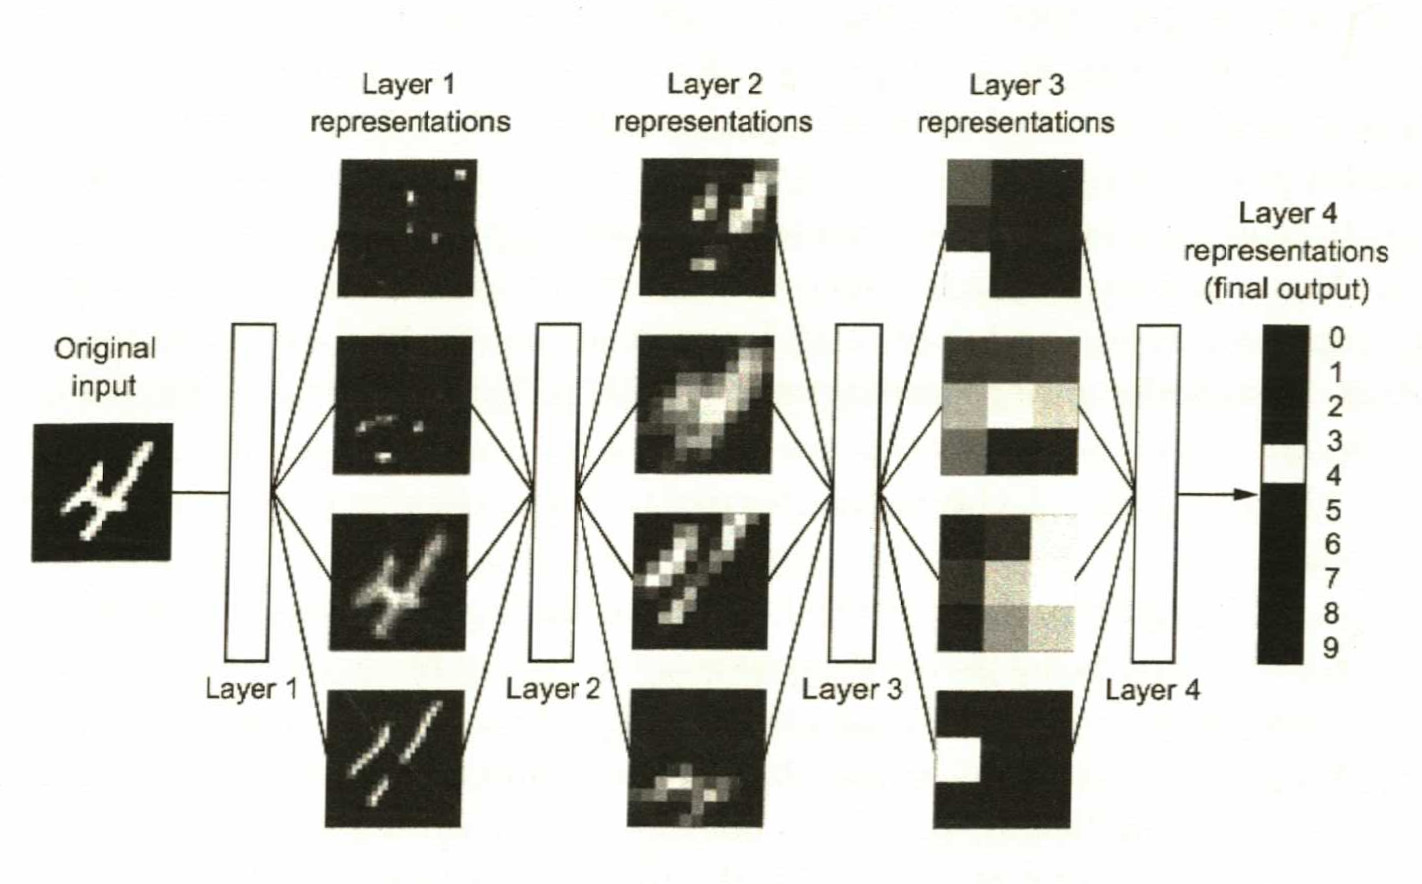

In [3]:
from IPython.display import Image
Image("images/chollet_data_moving_through_a_neural_network.jpg", width=300)

<p><i>Data representations learned by a digit-classification model</i>: As data moves through a neural network (NN), it is transformed as it combines with weights between the layers.</p>
<p>Hence, the data of input layer 0 is combined with the weights between layers 0 and 1, to become the data in layer 1.</p>
<p>This combining of data with weights proceeds through the neural network, until the transformed data reaches the output layer.</p>
<p>Training a neural network, simplified: the network's output is compared to desired output, the difference is quantified; and the quantification is used to update the values of the weights throughout the network. This is done again and again, until the output matches the desired output. At this point, the network is considered trained.</p>
<p>from <i>Chollet, François</i>. <b>Deep Learning With Python</b>. pg 8. Manning Publications, 2021.</p>

In [7]:
# hyperparameters
alpha = 0.2 # scale down correction to prevent overcorrection
hidden_size = 4

In [12]:
# initialization, weights
weights_0_1 = gradient_descent_deriv(random.random((3, hidden_size)))
weights_1_2 = gradient_descent_deriv(random.random((hidden_size, 1)))

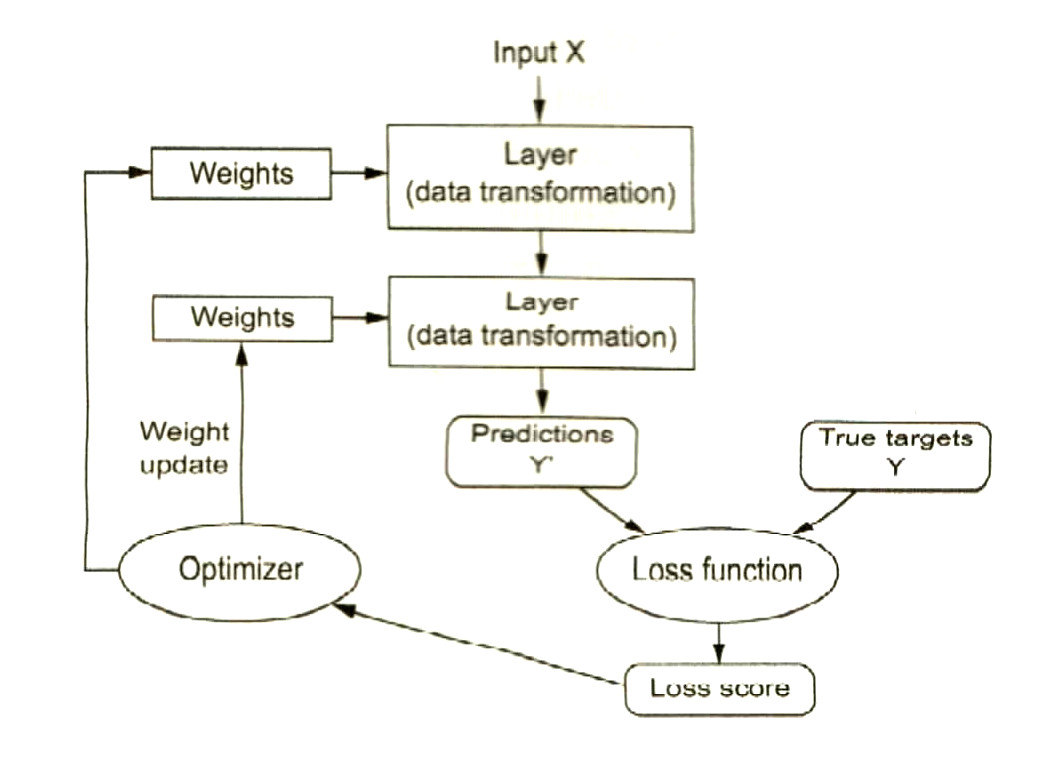

In [6]:
from IPython.display import Image
Image("images/chollet_understanding_how_deep_learning_works_fig_3.jpg", width=400)

<p><i>Understanding How Deep Learning Works</i>: A deep neural network (DNN) is made up of representation or transformation layers. Modifiable weights tune layer values. Input data is propagated forward through the network to a final layer, where it yields a prediction.</p>
<p>In a learning cycle, the error of the prediction is quantified by a loss function, an optimizer function then generates updates that are backpropagated through the network to the weights, tuning them.</p>
<p>The cycle is repeated: input forward propagates through the network, yielding a new prediction, its error is quantified; new updates to the weights in the network are back propagated.</p>
<p>from <i>Chollet, François</i>. <b>Deep Learning With Python</b>. pp 9-10. Manning Publications, 2021.</p>

In [13]:
# TNG
for iteration in range(300):
    ''' supervised learning
        streetlights are the input; walk_v_stop are the labels (desired output)
    '''
    # reset layer_2_error to 0
    layer_2_error = 0

    for index, values in enumerate(streetlights):
        # because layer_1 & 2 are calculated using the weights,
        # and the weights get modified each iteration,
        # the layers must be recalculated
        layer_0 = streetlights[index:index+1] # INPUT
        layer_1 = relu(dot(layer_0, weights_0_1)) # layer_0: (1, 3), weights_0_1: (3, 4); output: (1, 4)
        layer_2 = dot(layer_1, weights_1_2) # layer_1: (1, 4), weights_1_2: (4, 1); MODEL OUTPUT: scalar
        ''' the layers are interconnected.
            algebraically, we can restate the last two lines as:
            layer_2 = relu(layer_0.dot(weights_0_1)).dot(weights_1_2)
        '''

        # difference between layer 2 output and predicted values
        # for human consumption, to be printed at the end of the iteration
        layer_2_error += sum(gradient_descent(layer_2, walk_v_stop[index:index+1]))

        # calculate the correction
        layer_2_delta = (layer_2 - walk_v_stop[index:index+1])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1) # backpropagation

        # apply the correction --- note that corrected weights are running sums
        # alpha is a fractional value to dampen correction, preventing overcorrection
        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

    if (iteration % 10 == 9):
        print(f"Error: {layer_2_error:.25f}")

Error: 1.2119881686181301905236296
Error: 0.9082672908263217381730215
Error: 0.8374187335189828829129510
Error: 0.7105033135903576768654943
Error: 0.5028319055824949090904852
Error: 0.1869240051128016888437600
Error: 0.0204855139873008663953247
Error: 0.0011394618916524467885920
Error: 0.0000549346725020499849026
Error: 0.0000024970334689241966366
Error: 0.0000001117089482140886970
Error: 0.0000000049805327276037011
Error: 0.0000000002218969980237925
Error: 0.0000000000098846462066270
Error: 0.0000000000004403083452624
Error: 0.0000000000000196132591396
Error: 0.0000000000000008736590823
Error: 0.0000000000000000389165285
Error: 0.0000000000000000017335093
Error: 0.0000000000000000000772179
Error: 0.0000000000000000000034396
Error: 0.0000000000000000000001532
Error: 0.0000000000000000000000068
Error: 0.0000000000000000000000003
Error: 0.0000000000000000000000000
Error: 0.0000000000000000000000000
Error: 0.0000000000000000000000000
Error: 0.0000000000000000000000000
Error: 0.00000000000

In [9]:
%whos

Variable                 Type                          Data/Info
----------------------------------------------------------------
alpha                    float                         0.2
array                    builtin_function_or_method    <built-in function array>
dot                      _ArrayFunctionDispatcher      <built-in function dot>
gradient_descent         function                      <function gradient_descent at 0x7e82d1fa0900>
gradient_descent_deriv   function                      <function gradient_descen<...>_deriv at 0x7e82d1fa09a0>
hidden_size              int                           4
index                    int                           3
iteration                int                           299
layer_0                  ndarray                       1x3: 3 elems, type `int64`, 24 bytes
layer_1                  ndarray                       1x4: 4 elems, type `float64`, 32 bytes
layer_1_delta            ndarray                       1x4: 4 elems, type `float

In [27]:
dot(layer_0, weights_0_1).shape

(1, 4)

In [ ]:
import pickle
with open('pickle/weights_0_1.pickle.bin', 'wb') as out_file:
    pickle.dump(weights_0_1, out_file)
with open('pickle/weights_1_2.pickle.bin', 'wb') as out_file:
    pickle.dump(weights_1_2, out_file)